# **Importacion de paquetes**
---

In [1]:
import pandas as pd
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# **Carga de datos**
---

In [3]:
data=pd.read_csv('../../limpieza/aparts/DatasetAirbnb_Cleaned_v1.csv')

# **Correlaciones**
---

<Axes: >

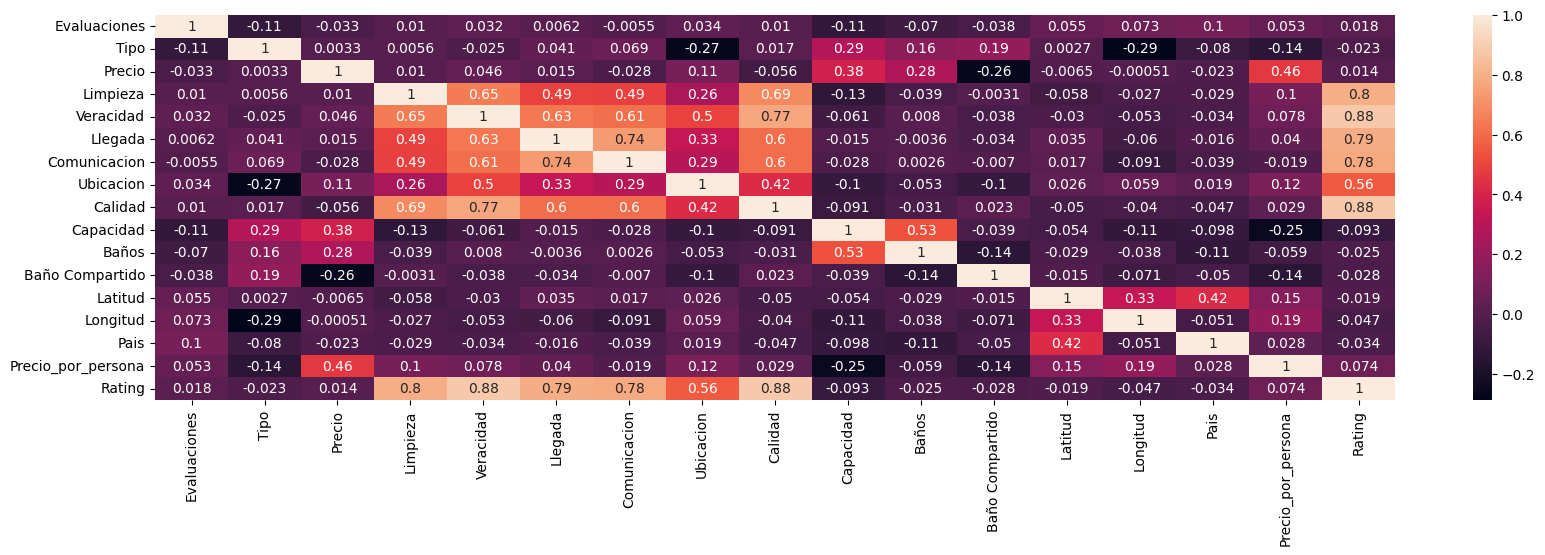

In [4]:
num_cols=data[[col for col in data.columns if col not in ['Wifi','Mascotas','Piscina','Parking','ID']]].select_dtypes(exclude='object').columns
plt.figure(figsize=(20,5))
sns.heatmap(data[num_cols].corr(),annot=True)


# **VIF**
---

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_cols=data[[col for col in data.columns if col not in ['ID']]].select_dtypes(exclude='object').columns
dfvif = data[num_cols]


vif_estan = [[dfvif.columns[i], variance_inflation_factor(dfvif.to_numpy(), i)] for i in range(dfvif.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan.sort_values(by='VIF')

/Users/mariolamas/anaconda3/envs/socialnetwork/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/mariolamas/anaconda3/envs/socialnetwork/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
15,Wifi,0.000000
18,Parking,0.000000
17,Piscina,0.000000
16,Mascotas,0.000000
0,Evaluaciones,1.033110
11,Baño Compartido,1.147221
14,Pais,1.359100
1,Tipo,1.375832
13,Longitud,1.382393
10,Baños,1.453677


In [6]:
data['Mascotas'].value_counts()

Mascotas
1.0    788
Name: count, dtype: int64

# **Catboost feature importance**
---

In [6]:
catreg=CatBoostRegressor(silent=True)
datos=data.drop(['ID','Titulo','Descripcion Simple','Limpieza','Veracidad','Ubicacion','Llegada','Comunicacion','Calidad','URL'],axis=1)
X=datos.drop('Rating',axis=1)
y=data['Rating']

catreg.fit(X,y)

In [7]:
pd.DataFrame(zip(catreg.feature_importances_,catreg.feature_names_),columns=['Importance','Var']).sort_values(by='Importance',ascending=False)

,Importance,Var
0,28.467178,Evaluaciones
13,16.562476,Precio_por_persona
2,14.114152,Precio
6,11.697087,Latitud
3,9.426576,Capacidad
7,7.761465,Longitud
1,5.462469,Tipo
4,4.374488,Baños
5,1.226874,Baño Compartido
8,0.907234,Pais


Vemos que los servicios no tienen influencia para predecir el rating.

En conclusion eliminamos las siguientes variables:
- Wifi
- Parking
- Piscina
- Mascotas
- Calidad
- Limpieza
- Ubicacion
- Comunicacion
- Llegada
- Veracidad

In [8]:
data_var_select=data.drop(['Wifi','Parking','Piscina','Mascotas','Calidad','Limpieza','Ubicacion','Comunicacion','Llegada','Veracidad'],axis=1)
data_var_select.to_csv('DatasetAirbnb_Varselect_v1.csv',index=False)